# ***TASK 0: Prerequisites***

**Import the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Load the dataset***

In [3]:
# Load the data from a CSV file
data = pd.read_csv("PROG8435_Assign_Explore_24S.csv")


***Display the first few rows of the dataset for overview***

In [4]:
data.head()

,id,group,hs.grad,nation,gender,age,m.status,political,n.child,income,housing,food,other,score,scr,time1,time2,time3,Pol
0,1,treat,no,Europe,female,49,divorced,Conservative,1,79252.66871,0.27,0.11,0.62,-0.36,0.100529,0.01,-0.53,0.10,2.977202
1,2,treat,no,North America,male,35,married,Conservative,0,104160.23850,0.47,0.23,0.30,0.69,0.783734,0.63,2.37,2.24,3.981942
2,3,treat,yes,Asia,male,46,divorced,New_Democrat,1,92824.38396,0.93,0.06,0.01,0.83,1.041129,1.00,2.15,2.12,2.953776
3,4,control,no,North America,male,18,widowed,New_Democrat,1,131866.26890,0.67,0.02,0.31,-1.61,0.601482,0.80,2.00,1.03,1.766428
4,5,control,no,Asia,female,62,divorced,New_Democrat,0,79769.76708,0.62,0.26,0.12,1.10,0.992247,0.31,-1.64,2.56,1.071818


# ***TASK 1: Summary Table***

**Summary table to show the total income by each category of marital status.**

In [5]:
summary_table = data.groupby('m.status')['income'].sum().reset_index()
print(summary_table)

   m.status        income
0  divorced  4.730589e+07
1   married  7.241662e+07
2     never  3.103900e+07
3   widowed  8.788122e+06


***Marital status with the highest total income***

In [6]:
highest_total_income_status = summary_table.loc[summary_table['income'].idxmax(), 'm.status']
print(highest_total_income_status)

married


**Calculate the mean age of respondents born in Asia.**

In [7]:
mean_age_asia = round(data.loc[data['nation'] == 'Asia', 'age'].mean(), 2)
print(mean_age_asia)

40.96


***Calculate the mean age of respondents born in Asia weighted by the number of children they have***

In [8]:
weighted_mean_age_asia = round(np.average(data.loc[data['nation'] == 'Asia', 'age'],
                                          weights=data.loc[data['nation'] == 'Asia', 'n.child']), 2)
print(weighted_mean_age_asia)


40.61


***Table to show the mean score on the political***

In [9]:
comparison_table = data.groupby('gender')['score'].mean().reset_index()
print(comparison_table)


   gender     score
0  female  0.006801
1    male  0.000706


***who has the highest mean score?***

In [10]:
highest_score = comparison_table.loc[comparison_table['score'].idxmax(), 'gender']
print(highest_score)

female


***Calculate the 34th and 63rd percentiles of percentage of time taken on the test***

In [11]:
percentiles = data['time1'].quantile([0.34, 0.63])
print(percentiles)

0.34    0.20
0.63    0.61
Name: time1, dtype: float64


# ***TASK 2 : ORGANIZING DATA***

***Pie chart***

***Create a pie chart showing the number of respondents by Political Affiliation***

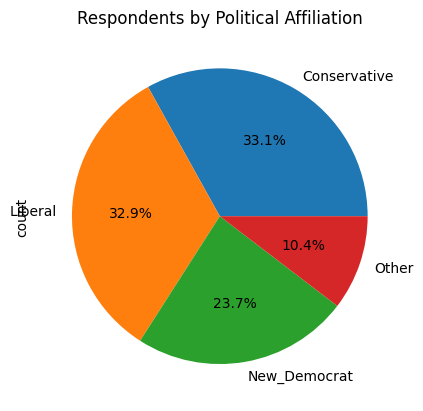

In [12]:
pie_table = data['political'].value_counts()
pie_table.plot.pie(autopct='%1.1f%%', title="Respondents by Political Affiliation")
plt.show()

***Which Political Affiliation contains the most respondents?***

In [13]:
most_respondents = pie_table.idxmax()
print(most_respondents)

Conservative


In [14]:
fewest_respondents = pie_table.idxmin()
print(fewest_respondents)

Other


***Summary Table***


***Create a table that shows the percentage of respondents from each Region in the Treatment group***

In [15]:
total_respondents_by_region = data['nation'].value_counts()
treat_counts_by_region = data[data['group'] == 'treat']['nation'].value_counts()
percentage_treat_respondents = (treat_counts_by_region / total_respondents_by_region) * 100
treat_summary_table = pd.DataFrame({
    'Region': percentage_treat_respondents.index,
    'Number_of_respondents': treat_counts_by_region.values,
    'Percentage_of_respondents': percentage_treat_respondents.values
})
print(treat_summary_table)

          Region  Number_of_respondents  Percentage_of_respondents
0  North America                    546                  49.954254
1           Asia                    242                  48.594378
2         Europe                    163                  53.267974
3       Southern                    124                  55.605381


***Which region has the highest and the lowest percentage of people in the Treatment group?***

In [17]:
highest_percentage_region = treat_summary_table.loc[treat_summary_table['Percentage_of_respondents'].idxmax(), 'Region']
lowest_percentage_region = treat_summary_table.loc[treat_summary_table['Percentage_of_respondents'].idxmin(), 'Region']

print("Highest: "+str(highest_percentage_region))
print("Lowest: "+str(lowest_percentage_region))

Highest: Southern
Lowest: Asia


***Barchart***

***Create a bar chart showing the mean Standardized Test Score on the Political Awareness Test for each Region(nation)***

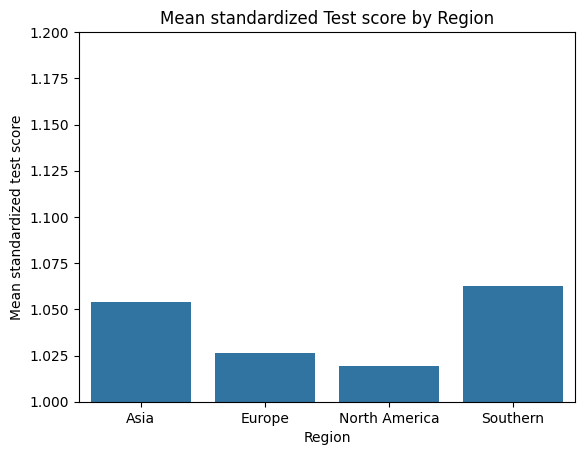

In [18]:
mean_scr_by_region = data.groupby('nation')['scr'].mean().reset_index()
sns.barplot(x='nation', y='scr', data=mean_scr_by_region)
plt.title('Mean standardized Test score by Region')
plt.xlabel('Region')
plt.ylabel('Mean standardized test score')
plt.ylim(1.0, 1.2)
plt.show()

***Which Region has the highest and lowest mean score?***

In [19]:
highest_mean_scr = mean_scr_by_region.loc[mean_scr_by_region['scr'].idxmax(), 'nation']
print("Highest: "+str(highest_mean_scr))

lowest_mean_scr = mean_scr_by_region.loc[mean_scr_by_region['scr'].idxmin(), 'nation']
print("Lowest: "+str(lowest_mean_scr))

Highest: Southern
Lowest: North America


***Histogram***

Create a histogram with 5 bins showing the distribution of the percentage of household income going to food.

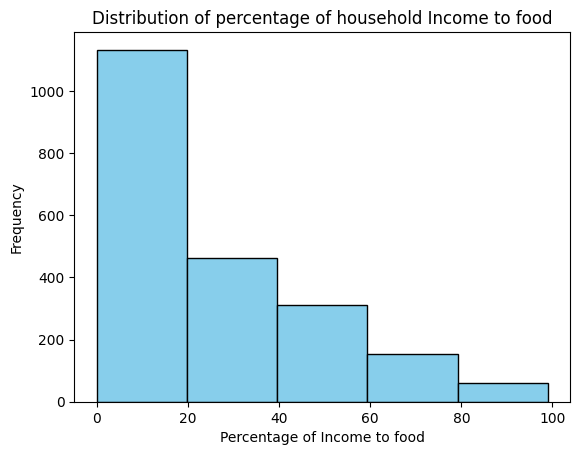

In [20]:
plt.hist(data['food']*100, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of percentage of household Income to food')
plt.xlabel('Percentage of Income to food')
plt.ylabel('Frequency')
plt.show()

***Boxplot***

***Create a sequence of box plots showing the distribution of income separated by marital status***

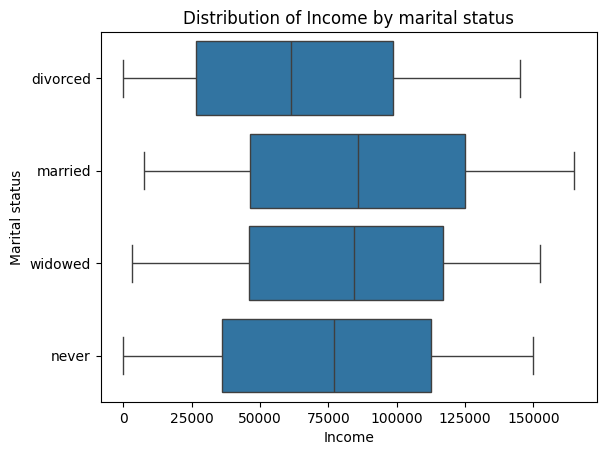

In [21]:
sns.boxplot(x='income', y='m.status', data=data)
plt.title('Distribution of Income by marital status')
plt.xlabel('Income')
plt.ylabel('Marital status')
plt.show()

***Scatterplot***

***Histogram of Income distribution and Standardized score distribution***

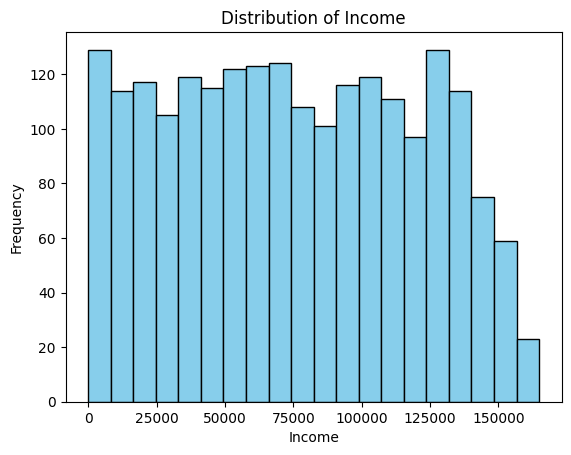

In [22]:
plt.hist(data['income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

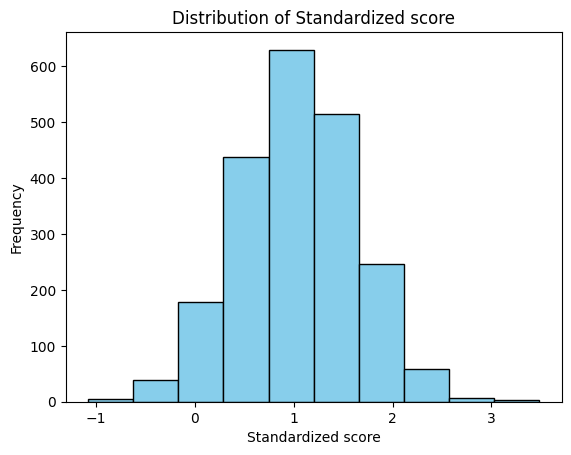

In [23]:
plt.hist(data['scr'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Standardized score')
plt.xlabel('Standardized score')
plt.ylabel('Frequency')
plt.show()

***Create a scatter plot showing the relationship between the income and standardized score***

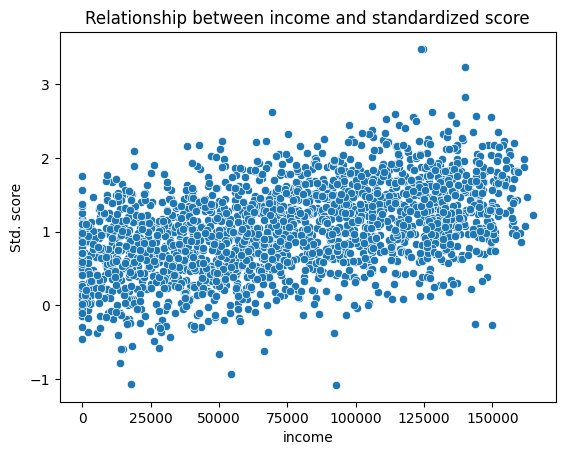

In [24]:
sns.scatterplot(x='income', y='scr', data=data)
plt.title('Relationship between income and standardized score')
plt.xlabel('income')
plt.ylabel('Std. score')
plt.show()

***Correlation coefficient between income and standardized score***

In [25]:
correlation_coefficient = data['income'].corr(data['scr'])
print(correlation_coefficient)

0.45684180775086614
